In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [250]:
data_head = ['Id','Diagnosis']
for i in range(30):
    data_head.append(i+1)   
data = pd.read_csv("wdbc.csv",names = data_head)
data.drop(['Id',11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],axis = 1,inplace = True)
data['Diagnosis'] = data['Diagnosis'].map({'M':-1,'B':1})
labels = data['Diagnosis']
data.drop(['Diagnosis'],axis=1,inplace=True)
data = data.to_numpy()
labels = labels.to_numpy()
data.shape

(569, 10)

In [252]:

#accuracy function
def train_accuracy(w,b):
    c = 0
    for i in range(len(data)):
        y_pred = np.sign(np.dot(w,data[i])+b)
        if labels[i] == y_pred:
            c = c+1
    return (c/(len(data))*100)    

#vanilla perceptron
def vanilla_perceptron(alpha,epochs):
    acc_per_epoch = np.zeros(epochs)
    w = np.random.uniform(0,0.5,10)
    b = 0
    for e in range(epochs):
        for j in range(len(data)):
            y = int(np.sign(np.dot(w,data[j])+b))
            if labels[j] != y:
                    w = np.add(w,(alpha*y*data[j])) #updating weights
                    b = b + (alpha)*y #bias update
            else:
                continue
        acc_per_epoch[e] = train_accuracy(w,b) #storing accuracy
        
    return acc_per_epoch
    

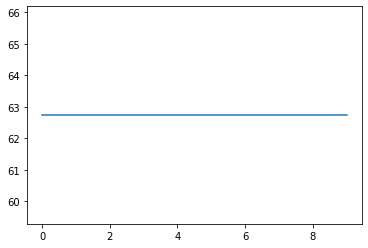

In [253]:
vanilla_acc = vanilla_perceptron(0.5,10)
#accuracy not improving with each epoch, data might not be linearly separable
plt.plot(np.arange(10),vanilla_acc)

In [254]:
#voted perceptron accuracy
def voted_accuracy(w_track,b_track):

def voted_perceptron(alpha,epochs):
    acc_per_epoch = np.zeros(epochs)
    w = np.random.uniform(0,0.5,10)
    b = 0
    w_track = np.zeros(569,10)
    b_track = np.zeros(569)
    for e in range(epochs):
        for j in range(len(data)):
            y = int(np.sign(np.dot(w,data[j])+b))
            if labels[j] != y:
                    w = np.add(w,(alpha*y*data[j])) #updating weights
                    b = b + (alpha)*y #bias update
                    w_track[j] = w
                    b_track[j] = b
            else:
                continue
        acc_per_epoch[e] = train_accuracy(w,b) #storing accuracy
        
    return acc_per_epoch